# WiFi Analyzer notebook

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def get_signal(x):
    return int(x[0:3])

def get_MHz(x):
    return int(x.split(" ")[1])

def get_freq(x):
    return int(x.split(" ")[0])

my_cmap = sns.cubehelix_palette(8)

In [3]:
DATA_PATH = os.path.normpath("data/")  # data path

In [4]:
# load files located in data folder

dfs = [] 

for floor in os.listdir(DATA_PATH):  # iterate through floor folders in data folder
    measure_points = glob.glob(os.path.join(DATA_PATH, floor) + "/*.csv")
    
    for measure_point in measure_points:  # iterate through files in floor folder
        point = measure_point.split("/")[-1][-5]
        
        DataFrame = pd.read_csv(measure_point, names=["Name", "MAC", "Authorization", "Freq [MHz]", 
                                                 "Channel", "Signal", "CenterFreq0 [MHz]", 
                                                 "CenterFreq1 [MHz]", "ChannelWidth [MHz]", "Floor", "Point"])
        
        DataFrame["Signal"] = DataFrame["Signal"].apply(get_signal)
        DataFrame["CenterFreq0 [MHz]"] = DataFrame["CenterFreq0 [MHz]"].apply(get_MHz)
        DataFrame["CenterFreq1 [MHz]"] = DataFrame["CenterFreq1 [MHz]"].apply(get_MHz)
        DataFrame["ChannelWidth [MHz]"] = DataFrame["ChannelWidth [MHz]"].apply(get_MHz)
        DataFrame["Freq [MHz]"] = DataFrame["Freq [MHz]"].apply(get_freq)
        DataFrame["Channel"] = DataFrame["Channel"].apply(get_MHz)
        DataFrame["Floor"] = floor[-1]
        DataFrame["Point"] = point[-1]
        
        dfs.append(DataFrame)

Data = pd.concat(dfs, ignore_index=True)
Data.head()

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
0,MP,e8:94:f6:e0:53:6a,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2412,1,-89,2422,0,40,2,3
1,eduroam,00:23:33:2b:d3:52,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2462,11,-88,0,0,20,2,3
2,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,2,3
3,AGH-WPA,00:23:33:2c:11:f1,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,2,3
4,AGH-WPA,00:23:33:2b:d3:51,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2462,11,-89,0,0,20,2,3


## Creating statistics
Loaded data was used for creating simple snaphots statistics.

I presented some results for five random networks appeared in the data.

### Getting networks names

In [5]:
set(Data["Name"].values)

{'3.hotspot.petroinform.net',
 'AGH-Events',
 'AGH-Guest',
 'AGH-WPA',
 'ASUS',
 'B5*601_2.4G',
 'Creative',
 'Doktoranci 605',
 'FAGH',
 'FunBox2-DAF6',
 'HUAWEI',
 'HUAWEI P8 lite',
 'HUAWEI_P9_CF7C',
 'KSW-Sekretariat',
 'Lumia 950 XL 9030',
 'MP',
 'MSM_716',
 'Metody',
 'NetGear 2.4GHz',
 'OpenWrt',
 'Redmi',
 'RezydencjaCzarnowiejska77',
 'RheaPLUS',
 'TP-LINK',
 'TP-LINK_408',
 'TP-LINK_7C641D',
 'TP-LINK_E9B0D0',
 'UPC Wi-Free',
 'UPC1421615',
 'UPC1821152',
 'UPC243339347',
 'UPC248636902',
 'UPC248884800',
 'UPC4057500',
 'UPC491321A',
 'UPCB8426AC',
 'UPCC7265CD',
 'Unimetal',
 'WLAN1-18DE7J',
 'WRSS_WIMiIP',
 'ZIP-1',
 'ZIP407',
 'agh-b7-18',
 'comel57',
 'dd-wrt',
 'eduroam',
 'iPhone (Arek)',
 'iPhone (Michał)',
 'k121opl',
 'lab111',
 nan,
 'pass',
 'wms_214a'}

### 5 most appearing networks

In [6]:
Data["Name"].value_counts().head()

AGH-Events    55
eduroam       53
AGH-WPA       51
AGH-Guest     51
dd-wrt        22
Name: Name, dtype: int64

### Total networks count

In [7]:
Data["Name"].nunique()

52

### 5 most appearing MAC addresses

In [8]:
Data["MAC"].value_counts().head()

00:23:33:2c:11:f0    23
00:23:33:2c:11:f2    23
00:23:33:2c:11:f3    22
00:13:10:92:a6:c8    22
00:23:33:2c:11:f1    21
Name: MAC, dtype: int64

### Total MAC addresses count

In [9]:
Data["MAC"].nunique()

74

### Number of unique networks available on each floor

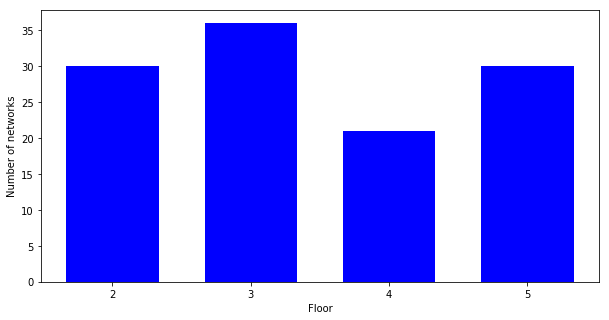

In [10]:
floors = [2,3,4,5]
networks_number = []

for x in floors:
    floor_data = Data[Data["Floor"]==str(x)]["Name"].nunique()
    networks_number.append(floor_data)

width = 1/1.5

plt.figure(figsize=(10,5))

plt.bar(floors, networks_number, width, color="blue", align="center")
plt.xticks(range(2,6,1), floors)
plt.xlabel("Floor")
plt.ylabel("Number of networks")
plt.show()

### Number of unique MAC addresses available on each floor

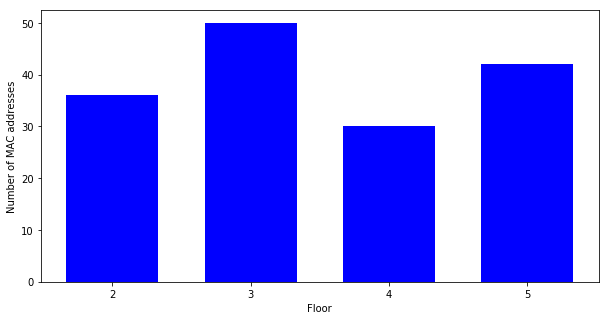

In [11]:
floors = [2,3,4,5]
MAC_number = []

for x in floors:
    floor_data = Data[Data["Floor"]==str(x)]["MAC"].nunique()
    MAC_number.append(floor_data)

width = 1/1.5

plt.figure(figsize=(10,5))

plt.bar(floors, MAC_number, width, color="blue", align="center")
plt.xticks(range(2,6,1), floors)
plt.xlabel("Floor")
plt.ylabel("Number of MAC addresses")
plt.show()

### Networks available on 2nd floor

In [12]:
second_floor = Data[Data["Floor"]=="2"]
second_floor = second_floor.reset_index(drop=True)
second_floor.drop_duplicates(["Name"],inplace=True)
second_floor.insert(0, "NR", range(1, 1 + len(second_floor)))
second_floor.set_index("NR")

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
NR,,,,,,,,,,,
1,MP,e8:94:f6:e0:53:6a,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2412,1,-89,2422,0,40,2,3
2,eduroam,00:23:33:2b:d3:52,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2462,11,-88,0,0,20,2,3
3,AGH-WPA,00:23:33:2c:11:f1,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,2,3
4,Creative,e4:be:ed:12:c0:5e,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],2437,6,-90,2447,0,40,2,3
5,AGH-Events,00:23:33:2b:d3:53,[ESS][BLE],2462,11,-92,0,0,20,2,3
6,AGH-Guest,00:23:33:2c:11:f0,[ESS][BLE],2412,1,-74,0,0,20,2,3
7,NaN,00:1d:0f:e2:75:6a,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP-preauth...,2467,12,-86,0,0,20,2,3
8,TP-LINK_E9B0D0,54:e6:fc:e9:b0:d0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP-preauth...,2437,6,-83,0,0,20,2,3
9,WRSS_WIMiIP,78:54:2e:f8:46:d0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][E...,2462,11,-94,0,0,20,2,3


### Networks available on 3rd floor

In [13]:
third_floor = Data[Data["Floor"]=="3"]
third_floor = third_floor.reset_index(drop=True)
third_floor.drop_duplicates(["Name"],inplace=True)
third_floor.insert(0, "NR", range(1, 1 + len(third_floor)))
third_floor.set_index("NR")

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
NR,,,,,,,,,,,
1,TP-LINK_E9B0D0,54:e6:fc:e9:b0:d0,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP-preauth...,2437,6,-92,0,0,20,3,3
2,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,3,3
3,AGH-Events,00:23:33:2c:11:f3,[ESS][BLE],2412,1,-73,0,0,20,3,3
4,AGH-Guest,00:23:33:2c:11:f0,[ESS][BLE],2412,1,-75,0,0,20,3,3
5,AGH-WPA,00:23:33:2c:11:f1,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-76,0,0,20,3,3
6,NetGear 2.4GHz,c4:04:15:18:3a:b3,[WPA2-PSK-CCMP][WPS][ESS],2462,11,-96,2452,0,40,3,3
7,dd-wrt,00:13:10:92:a6:c8,[WPA2-PSK-CCMP][ESS],2437,6,-94,0,0,20,3,3
8,TP-LINK_408,f8:1a:67:ed:f4:65,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2437,6,-96,2427,0,40,3,3
9,k121opl,00:1d:0f:fb:20:44,[WPA2-PSK-CCMP-preauth][ESS],2462,11,-88,0,0,20,3,3


### Networks available on 4th floor

In [14]:
forth_floor = Data[Data["Floor"]=="4"]
forth_floor = forth_floor.reset_index(drop=True)
forth_floor.drop_duplicates(["Name"],inplace=True)
forth_floor.insert(0, "NR", range(1, 1 + len(forth_floor)))
forth_floor.set_index("NR")

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
NR,,,,,,,,,,,
1,TP-LINK_408,f8:1a:67:ed:f4:65,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2437,6,-76,2427,0,40,4,3
2,NaN,10:bf:48:3b:ff:a7,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],2432,5,-80,2422,0,40,4,3
3,dd-wrt,00:13:10:92:a6:c8,[WPA2-PSK-CCMP][ESS],2437,6,-61,0,0,20,4,3
4,NetGear 2.4GHz,c4:04:15:18:3a:b3,[WPA2-PSK-CCMP][WPS][ESS],2462,11,-77,2452,0,40,4,3
5,ZIP407,54:e6:fc:b7:38:2e,[WPA2-PSK-CCMP][ESS],2412,1,-64,0,0,20,4,3
6,ZIP-1,00:0f:66:5b:24:5c,[ESS],2437,6,-96,0,0,20,4,3
7,AGH-Guest,00:23:33:2c:11:f0,[ESS][BLE],2412,1,-84,0,0,20,4,3
8,AGH-WPA,00:23:33:2c:11:f1,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-83,0,0,20,4,3
9,AGH-Events,00:23:33:2c:11:f3,[ESS][BLE],2412,1,-72,0,0,20,4,3


### Networks available on 5th floor

In [15]:
fifth_floor = Data[Data["Floor"]=="5"]
fifth_floor = fifth_floor.reset_index(drop=True)
fifth_floor.drop_duplicates(["Name"],inplace=True)
fifth_floor.insert(0, "NR", range(1, 1 + len(fifth_floor)))
fifth_floor.set_index("NR")

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
NR,,,,,,,,,,,
1,RheaPLUS,8c:79:67:cd:6c:d1,[WPA2-PSK-CCMP][WPS][ESS],2447,8,-75,0,0,20,5,3
2,AGH-WPA,00:23:33:2b:da:01,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-76,0,0,20,5,3
3,AGH-Guest,00:23:33:2b:da:00,[ESS][BLE],2412,1,-74,0,0,20,5,3
4,eduroam,00:23:33:2b:da:02,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-80,0,0,20,5,3
5,AGH-Events,00:23:33:2b:da:03,[ESS][BLE],2412,1,-82,0,0,20,5,3
6,B5*601_2.4G,e4:be:ed:13:0c:ba,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS],2437,6,-75,2447,0,40,5,3
7,k121opl,00:1d:0f:fb:20:44,[WPA2-PSK-CCMP-preauth][ESS],2462,11,-88,0,0,20,5,3
8,iPhone (Michał),fe:a9:04:1f:c3:f9,[WPA2-PSK-CCMP][ESS],2437,6,-96,0,0,20,5,3
9,TP-LINK_408,f8:1a:67:ed:f4:65,[WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS],2437,6,-88,2427,0,40,5,3


### Number of channels

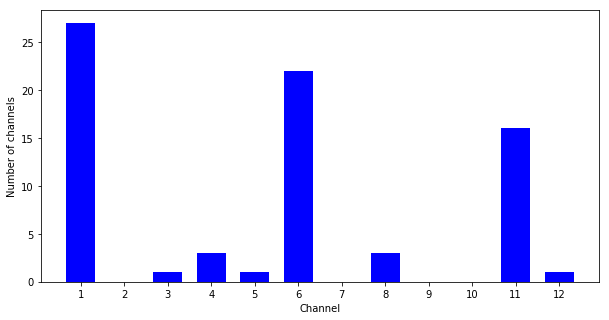

In [16]:
channels = Data["Channel"].unique()
channels = np.array(channels).tolist()
channels.sort()

channel_number = []

for x in channels:
    floor_data = Data[Data["Channel"]==int(x)]["MAC"].nunique()
    floor_data = int(floor_data)
    channel_number.append(floor_data)

width = 1/1.5

plt.figure(figsize=(10,5))

plt.bar(channels, channel_number, width, color="blue", align="center")
plt.xticks(range(1,13,1))
plt.xlabel("Channel")
plt.ylabel("Number of channels")
plt.show()

## Heatmap example
I presented statistics and a couple of heatmap examples created from Wifi Analyzer snapshots for **eduroam** network.

#### Number of unique MAC addresses or eduroam

In [17]:
Data[Data["Name"]=="eduroam"]["MAC"].value_counts()

00:23:33:2c:11:f2    23
00:23:33:2b:da:02    13
00:23:33:2b:d3:52    10
00:23:33:2c:18:92     7
Name: MAC, dtype: int64

##### 00:23:33:2c:11:f2

In [18]:
network = Data.loc[(Data["Name"] == "eduroam") & (Data["MAC"] == "00:23:33:2c:11:f2")]
network.head()

,Name,MAC,Authorization,Freq [MHz],Channel,Signal,CenterFreq0 [MHz],CenterFreq1 [MHz],ChannelWidth [MHz],Floor,Point
2,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,2,3
24,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-74,0,0,20,2,2
41,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-82,0,0,20,2,1
57,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-87,0,0,20,2,5
77,eduroam,00:23:33:2c:11:f2,[WPA-EAP-CCMP][WPA2-EAP-CCMP][ESS][BLE],2412,1,-83,0,0,20,2,4


In [19]:
pivot = network.pivot(index="Floor", columns="Point", values="Signal")
#eduroam_pivot.fillna(-99, inplace=True)
pivot.sort_index(level=0, ascending=False, inplace=True)
pivot

Point,1,2,3,4,5,6,7
Floor,,,,,,,
5,NaN,NaN,-88.0,-76.0,-91.0,-97.0,NaN
4,NaN,-68.0,-74.0,-72.0,-89.0,-90.0,-90.0
3,-82.0,-81.0,-74.0,-57.0,-74.0,-79.0,-80.0
2,-82.0,-74.0,-74.0,-83.0,-87.0,-91.0,NaN


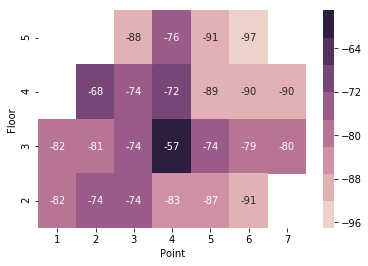

In [20]:
sns.heatmap(pivot, annot=True, cmap=my_cmap)

##### 00:23:33:2b:da:02

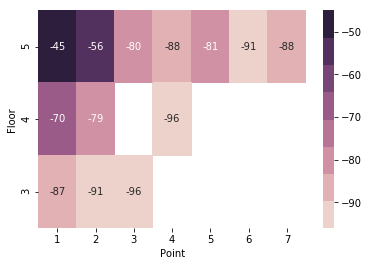

In [21]:
network = Data.loc[(Data["Name"] == "eduroam") & (Data["MAC"] == "00:23:33:2b:da:02")]
pivot = network.pivot(index="Floor", columns="Point", values="Signal")
pivot.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(pivot, annot=True, cmap=my_cmap)

##### 00:23:33:2c:11:f2

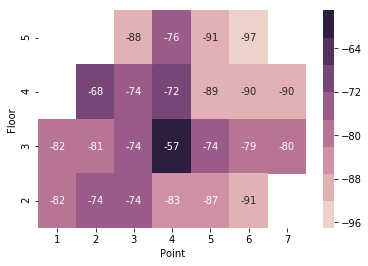

In [22]:
network = Data.loc[(Data["Name"] == "eduroam") & (Data["MAC"] == "00:23:33:2c:11:f2")]
pivot = network.pivot(index="Floor", columns="Point", values="Signal")
pivot.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(pivot, annot=True, cmap=my_cmap)